<a href="https://colab.research.google.com/github/kelvin2250/Ti-u-s-Minh-M-t-Tr-n/blob/master/BT1_23521149.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
penguins = sns.load_dataset('penguins')

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='species', ylabel='body_mass_g'>

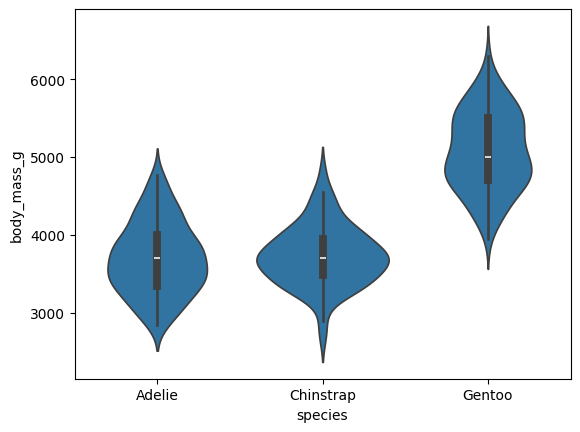

In [4]:
sns.violinplot(x=penguins["species"], y=penguins["body_mass_g"])

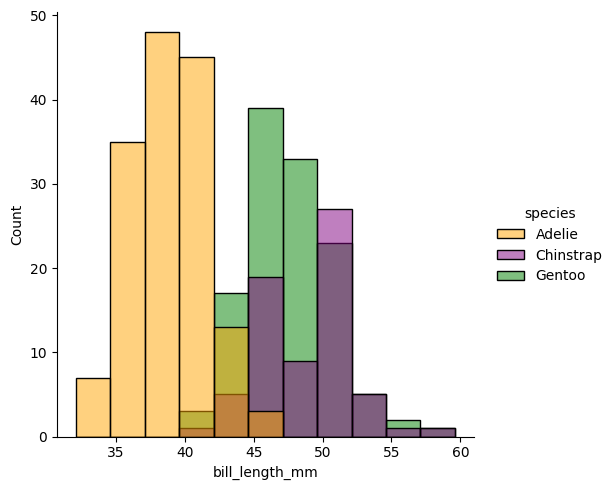

In [5]:
palette = {'Adelie': 'orange', 'Gentoo': 'green', 'Chinstrap': 'purple'}
sns.displot(data=penguins, x='bill_length_mm', hue='species',  palette=palette)

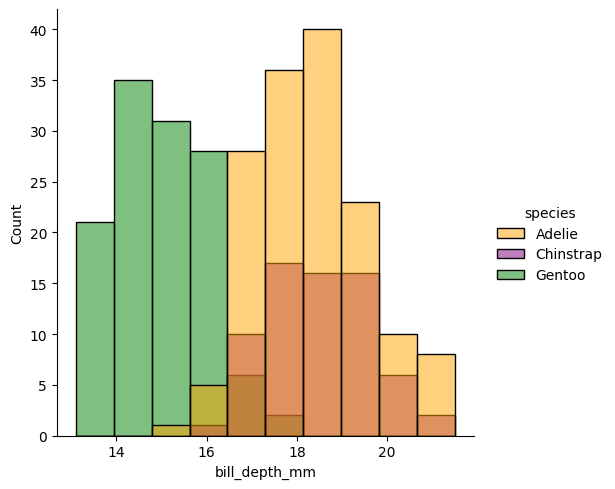

In [6]:
sns.displot(data=penguins, x='bill_depth_mm', hue='species', palette=palette)

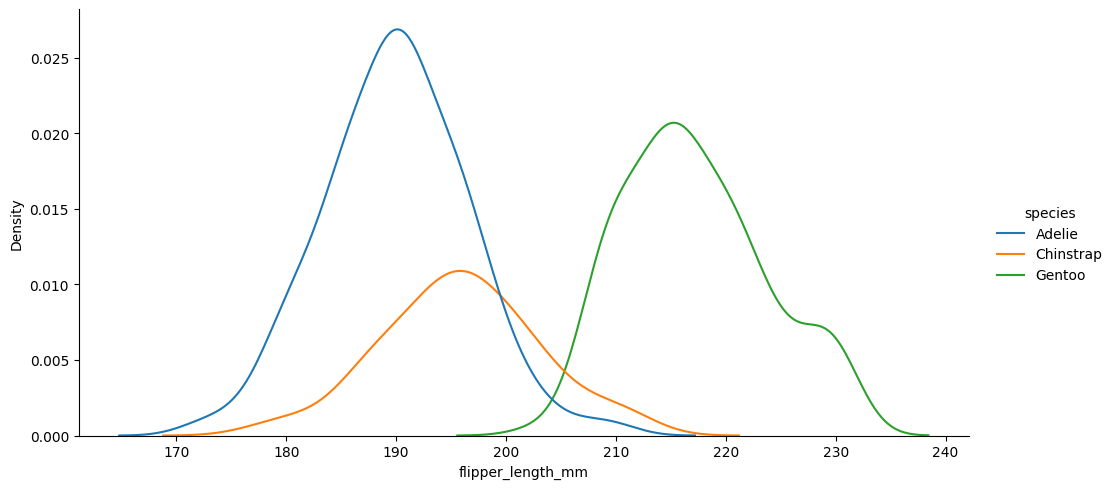

In [7]:
sns.displot(data=penguins , kind='kde', x='flipper_length_mm', hue='species', aspect=2);

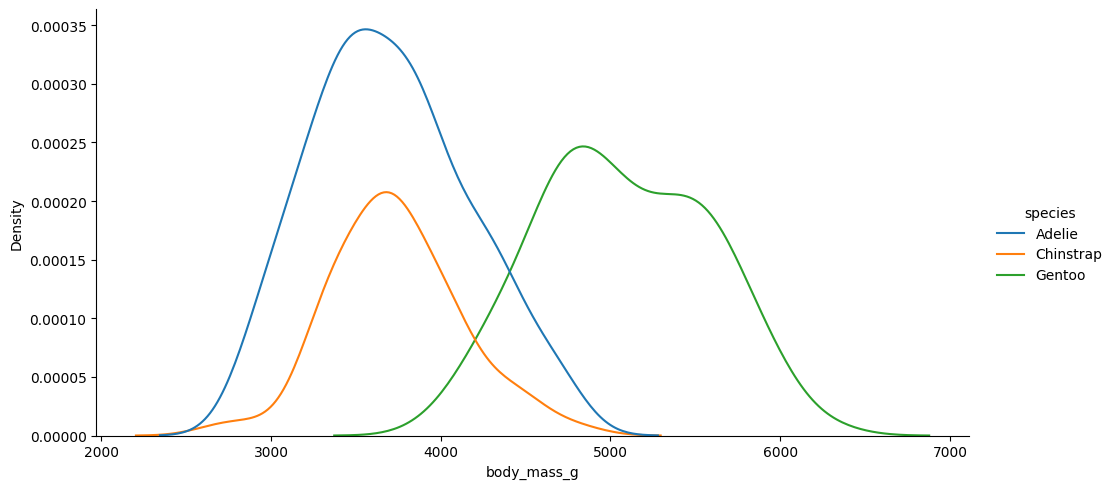

In [8]:
sns.displot(data=penguins, kind='kde', x='body_mass_g', hue='species', aspect=2);

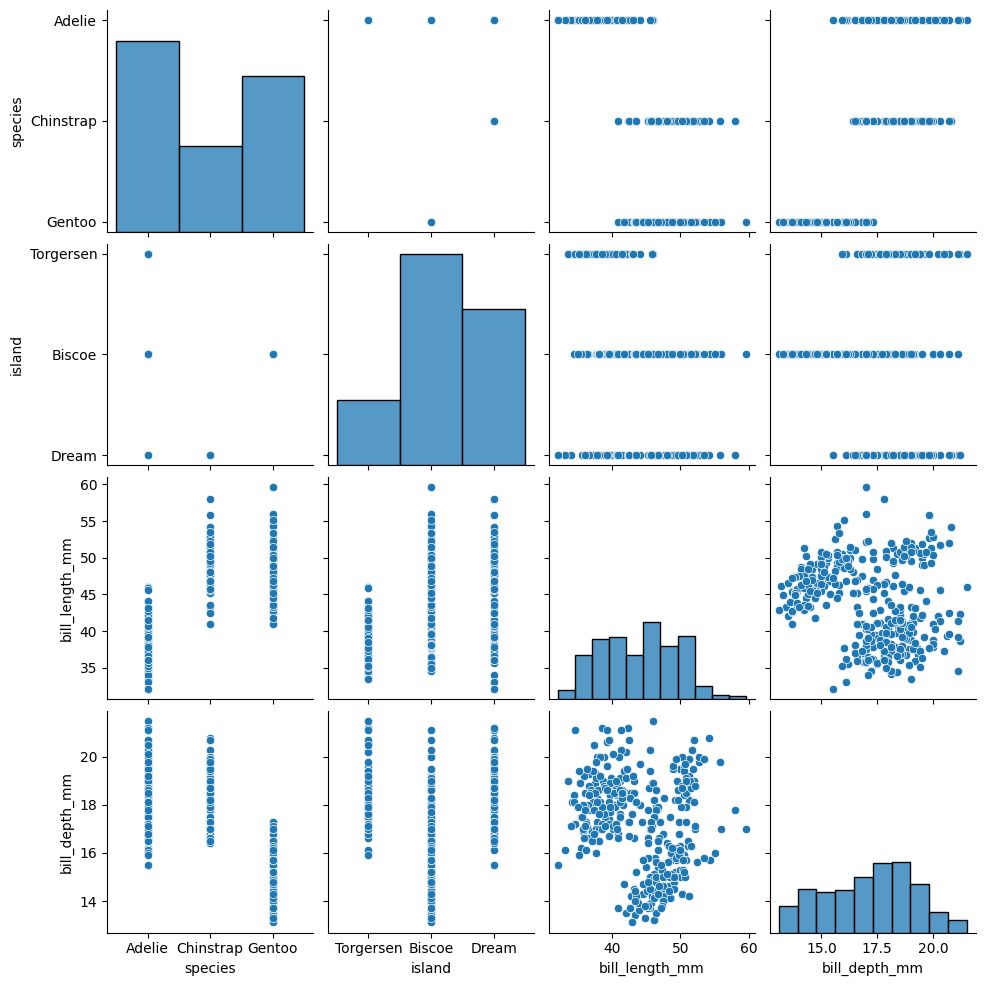

In [9]:
sns.pairplot(data=penguins, vars=penguins.columns[0:4])

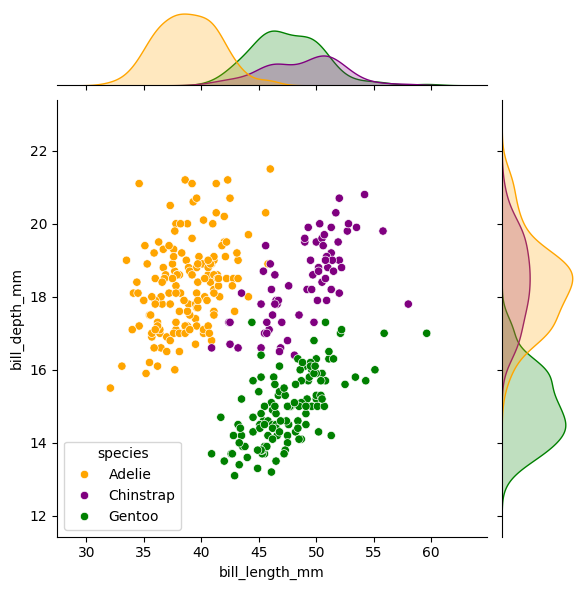

In [10]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species',  palette=palette)

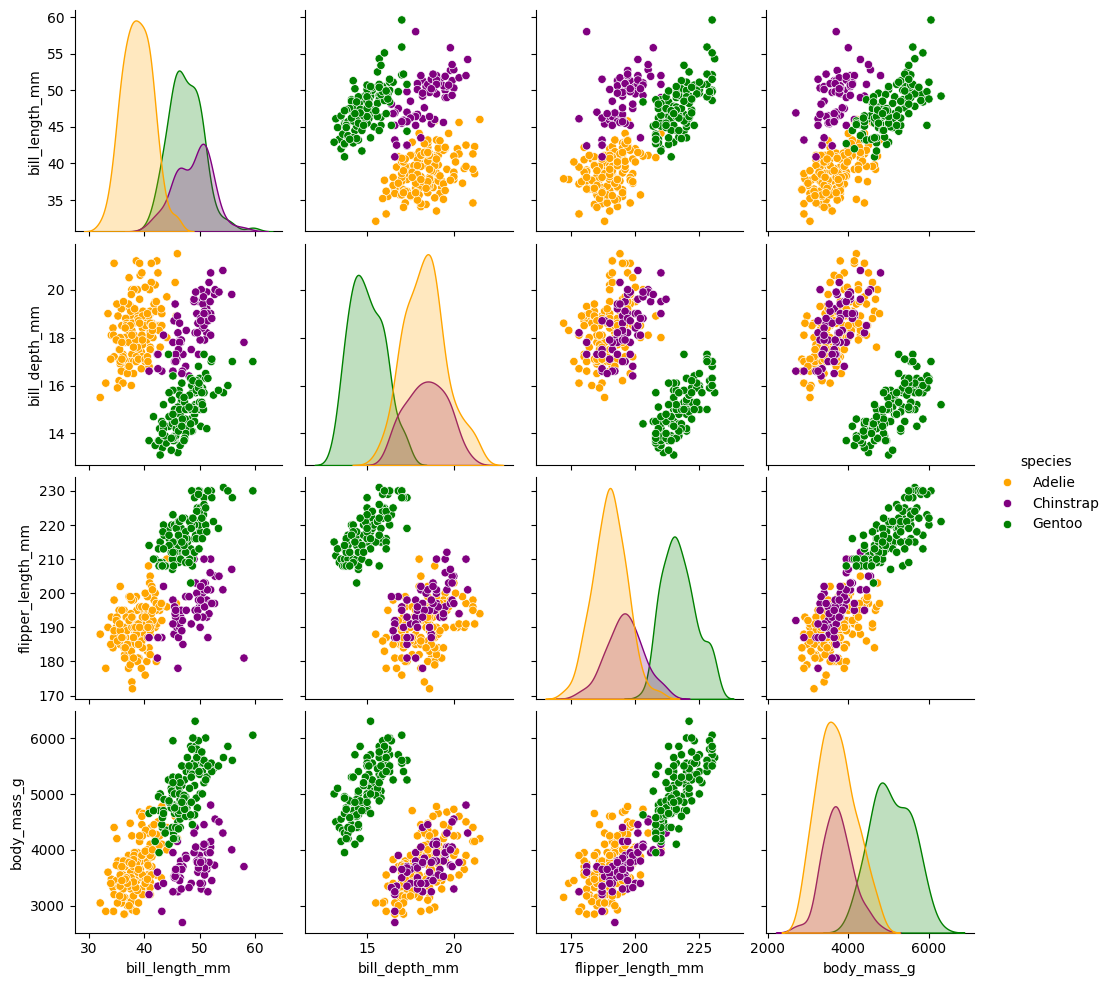

In [11]:

numeric_columns = penguins.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(data=penguins, vars=numeric_columns, hue='species', palette=palette)
plt.show()


<Axes: title={'center': 'Số lượng cánh cụt theo giới tính'}, ylabel='count'>

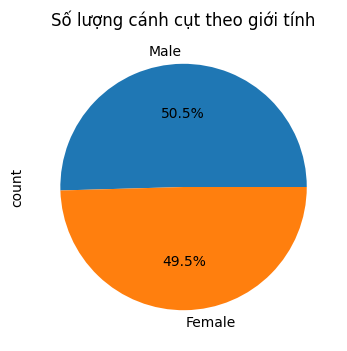

In [12]:
penguins['sex'].value_counts().plot(kind='pie', figsize=(4, 4), title="Số lượng cánh cụt theo giới tính", autopct='%1.1f%%')

In [17]:
penguins = sns.load_dataset('penguins')
penguins['sex'] = penguins['sex'].map({'Male': 0, 'Female': 1})
# penguins = pd.get_dummies(penguins, columns=['island'], drop_first=True)



# Kiểm tra missing data
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


**Address Missing Data:**



In [18]:
# Cách 1: Chúng ta sẽ bỏ qua missing data

penguins_drop = penguins.dropna()

# Print missing data sau khi drop
print(f"Missing values after drop: {penguins_drop.isnull().sum()}")

# --------Nhận xét:
# Việc bỏ các giá trị bị thiếu có thể dẫn đến mất dữ liệu có giá trị, đặc biệt khi tập dữ liệu nhỏ.
# Thường ít dùng vì việc tìm kiếm thu thập dữ liệu đã rất tốn công và khó
# Mặc dù đơn giản hóa quy trình nhưng nó có thể tác động tiêu cực đến hiệu suất của mô hình bằng cách xóa các hàng có thể cung cấp thông tin hữu ích.
# Drop rows with missing values

Missing values after drop: species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [23]:
# Cách 2: Điền những giá trị Trung Bình vào missing value (Mean Imputation)
# Fill missing values with mean
# Chỉ điền giá trị trung bình cho các cột số
import numpy as np

penguins_mean = penguins.copy()

# Tính toán giá trị trung bình cho các cột số
numeric_cols = penguins.select_dtypes(include=[np.number]).columns

# Điền giá trị trung bình cho các cột số
penguins_mean[numeric_cols] = penguins_mean[numeric_cols].fillna(penguins_mean[numeric_cols].mean())

# Kiểm tra lại xem missing data còn hay không
print(penguins_mean.isnull().sum())


# --------Nhận xét:
# Điền giá trị trung bình của cột vào các giá trị còn thiếu là một phương pháp đơn giản và nhanh chóng.
# Tuy nhiên, cách tiếp cận này không tính đến mối quan hệ giữa các đặc điểm và có thể gây ra sai lệch, đặc biệt khi phân phối bị sai lệch.

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [32]:
#  Cách 3: Xử Lý Missing Data Bằng KNN (KNN Imputation)

from sklearn.impute import KNNImputer
import pandas as pd

penguins = sns.load_dataset('penguins')
# Bước 1: Chuyển đổi cột 'sex' từ chuỗi sang số
penguins['sex'] = penguins['sex'].map({'Male': 0, 'Female': 1})

# Bước 2: Chuyển đổi cột 'island' bằng One-Hot Encoding
penguins_encoded = pd.get_dummies(penguins, columns=['island'], drop_first=True)

# Bước 3: Sử dụng KNN Imputation để điền dữ liệu thiếu
imputer = KNNImputer(n_neighbors=5)

# Loại bỏ cột 'species' trước khi áp dụng KNN vì đây là biến mục tiêu
penguins_knn = pd.DataFrame(imputer.fit_transform(penguins_encoded.drop(columns=['species'])), columns=penguins_encoded.columns.drop('species'))

# Thêm lại cột 'species' vào sau khi đã điền giá trị thiếu
penguins_knn['species'] = penguins['species']






# --------Nhận xét:
# KNN Imputation có thể lưu giữ nhiều dữ liệu hơn một cách hiệu quả bằng cách ước tính các giá trị còn thiếu dựa trên các quan sát tương tự.
# Phương pháp này đặc biệt hữu ích khi có mối quan hệ giữa các đối tượng, cho phép suy ra các giá trị còn thiếu từ các giá trị lân cận.

Khảo sát các cách xử lý missing **data**

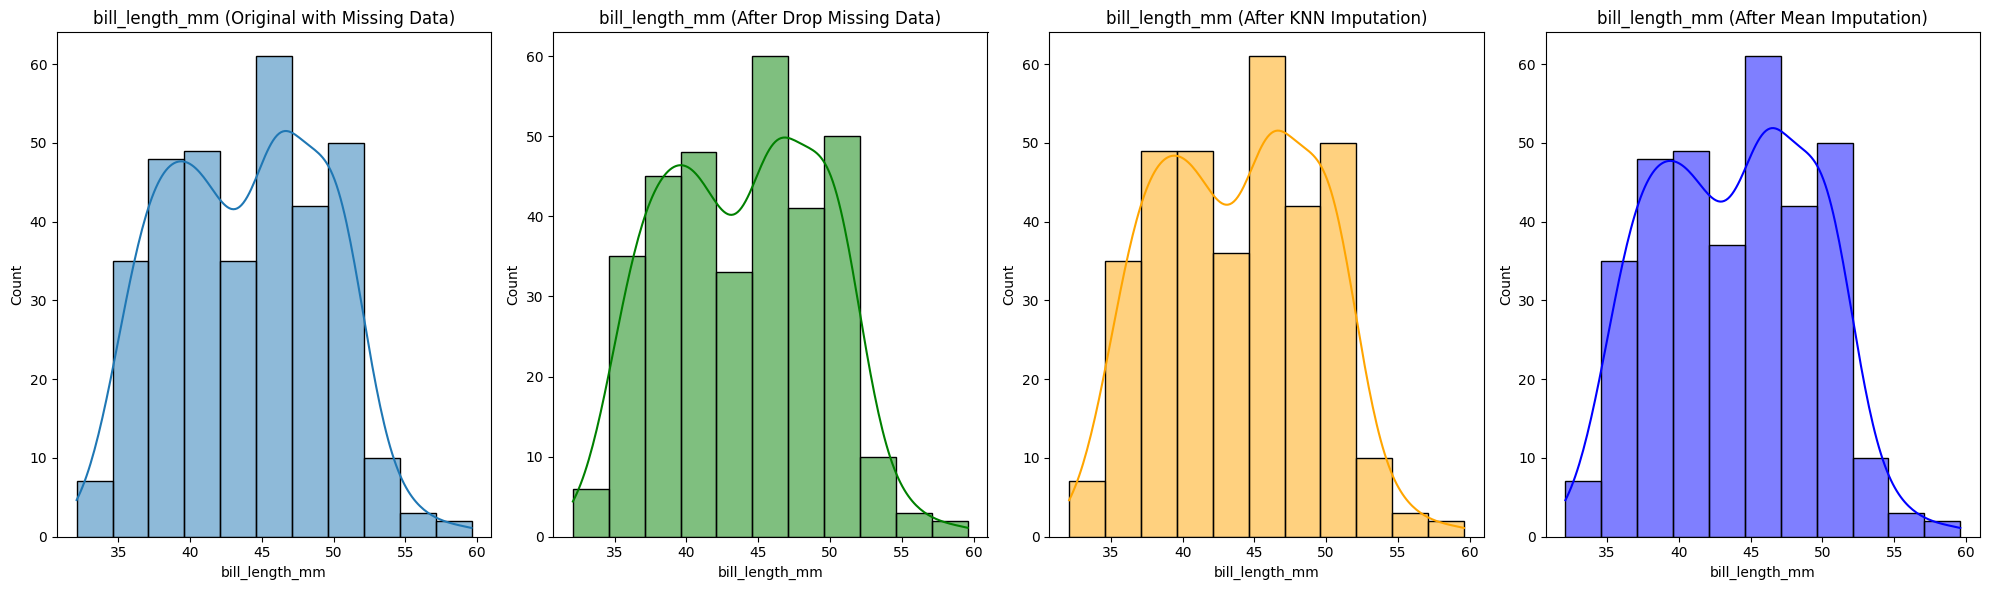

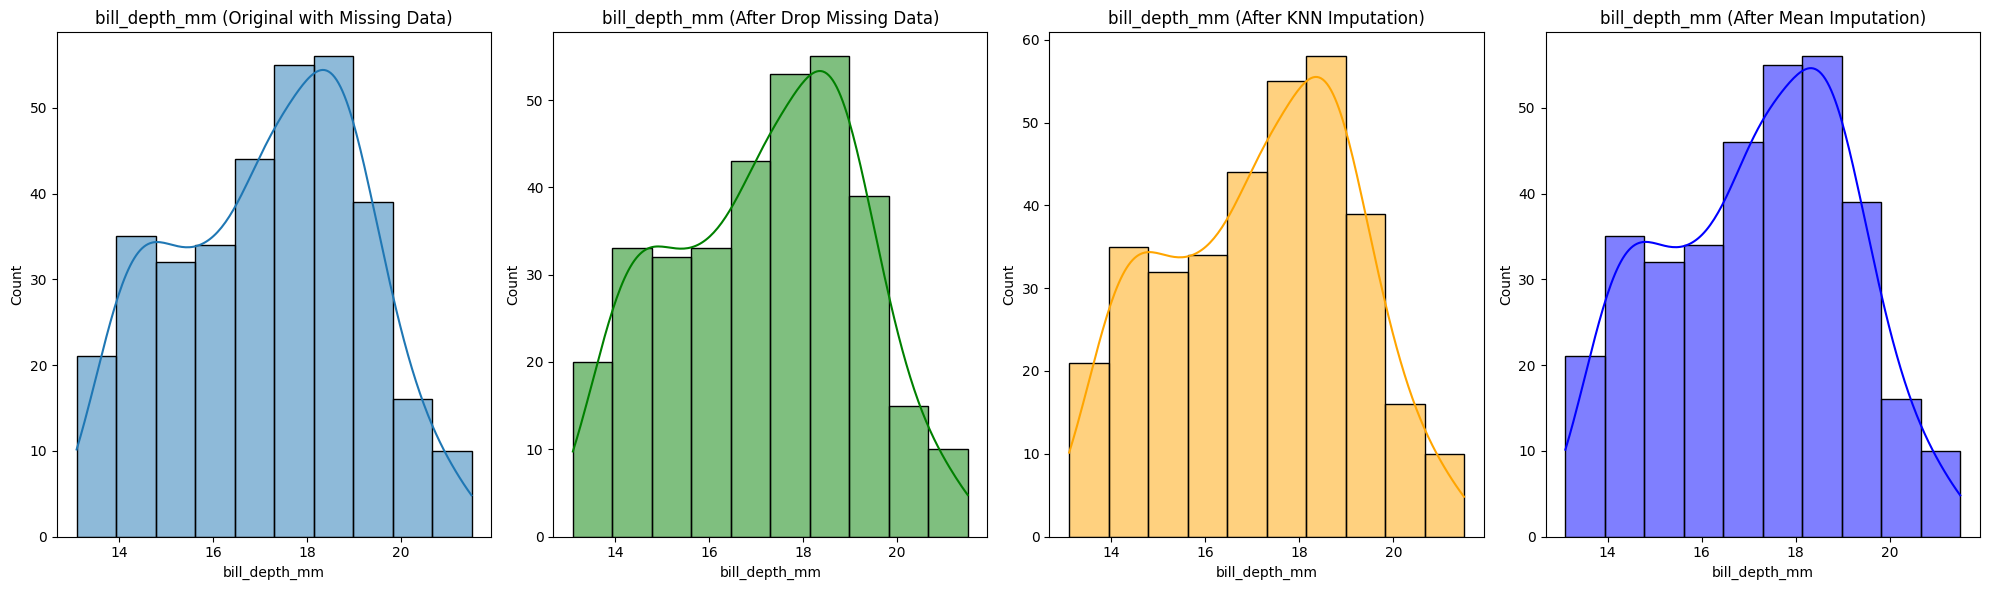

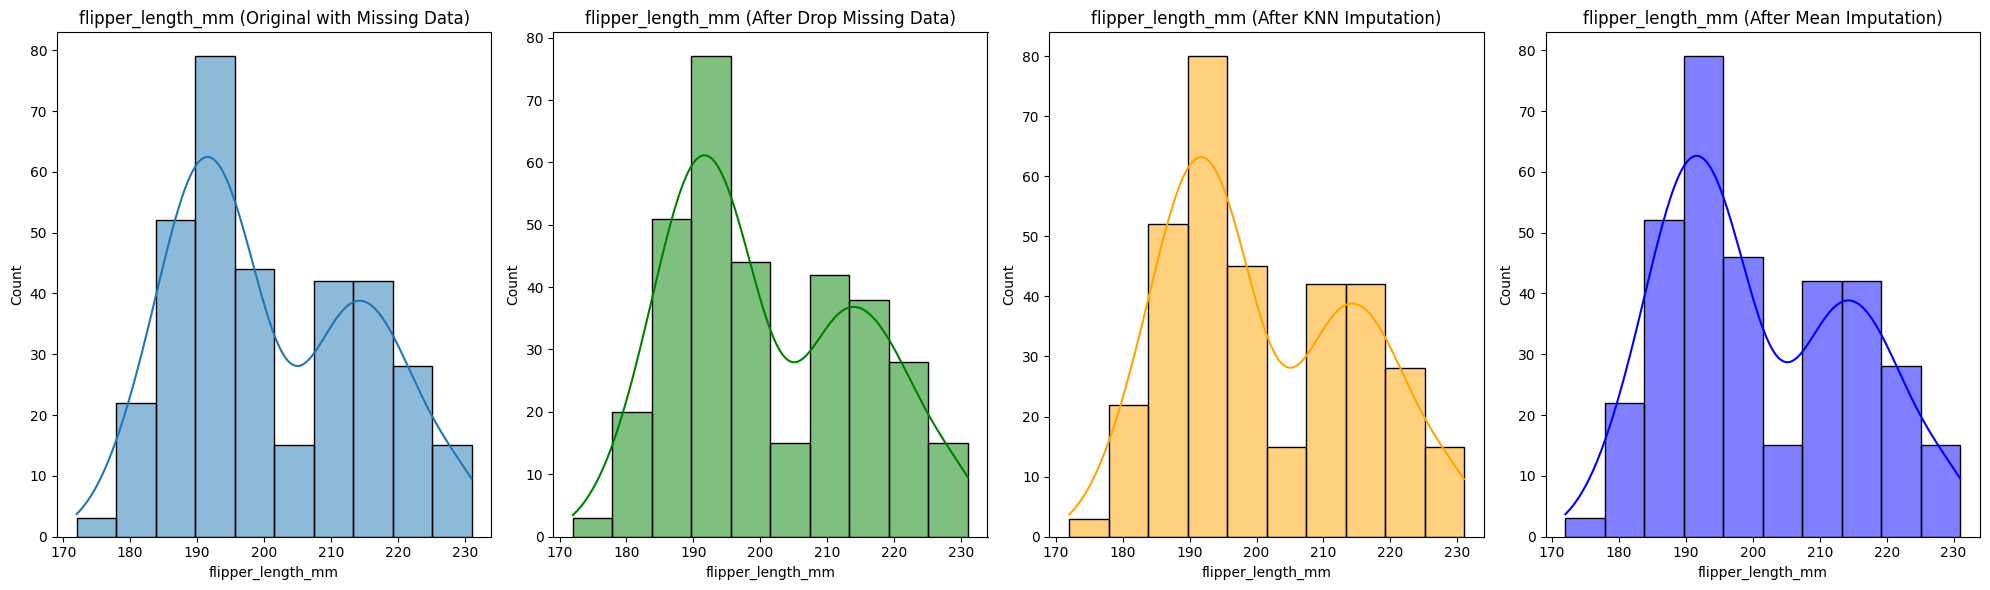

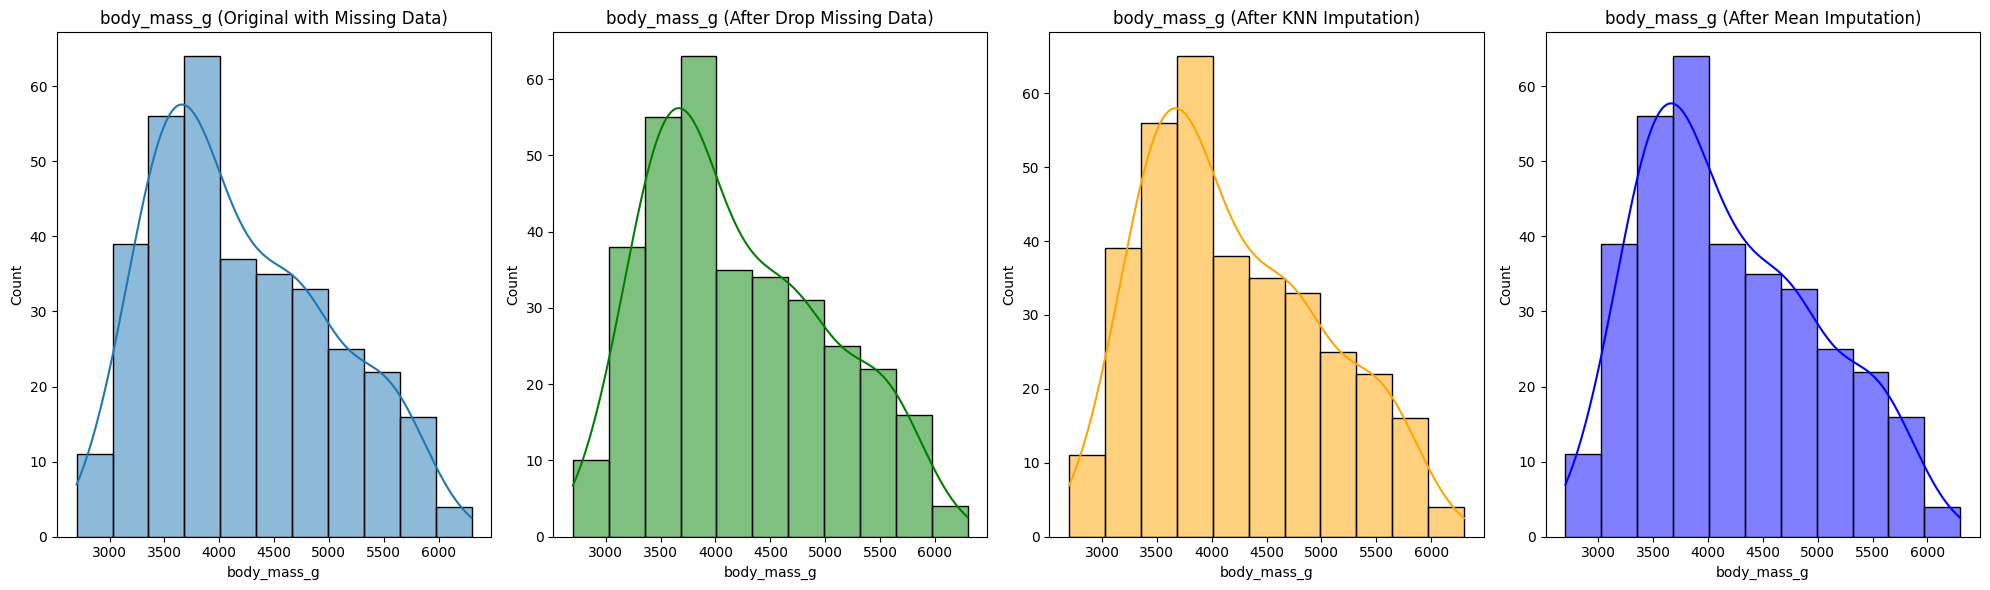

In [33]:
def plot_distribution(variable):
    plt.figure(figsize=(20, 6))

    # Original
    plt.subplot(1, 4, 1)
    sns.histplot(data=penguins, x=variable, kde=True)
    plt.title(f'{variable} (Original with Missing Data)')

    # Distribution after dropna
    plt.subplot(1, 4, 2)
    sns.histplot(data=penguins_drop, x=variable, kde=True, color='green')
    plt.title(f'{variable} (After Drop Missing Data)')

    # Distribution after KNN Imputation
    plt.subplot(1, 4, 3)
    sns.histplot(data=penguins_knn, x=variable, kde=True, color='orange')
    plt.title(f'{variable} (After KNN Imputation)')

    # Distribution after Mean Imputation
    plt.subplot(1, 4, 4)
    sns.histplot(data=penguins_mean, x=variable, kde=True, color='blue')
    plt.title(f'{variable} (After Mean Imputation)')

    plt.tight_layout()
    plt.show()

# Ví dụ plot sự phân bố của các biến
plot_distribution('bill_length_mm')
plot_distribution('bill_depth_mm')
plot_distribution('flipper_length_mm')
plot_distribution('body_mass_g')

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Sử dụng một trong các cách xử lý dữ liệu như penguins_drop, penguins_mean, hoặc penguins_knn
penguins_clear = penguins_drop  # Loại bỏ hàng chứa dữ liệu thiếu
# penguins_clear = penguins_mean  # Điền dữ liệu thiếu bằng giá trị trung bình
# penguins_clear = penguins_knn   # Điền dữ liệu thiếu bằng KNN Imputation

# Mã hóa nhãn 'species' thành các giá trị số
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(penguins_clear['species'])

# Loại bỏ cột 'species' khỏi dữ liệu đặc trưng X trước khi sử dụng One-Hot Encoding
X = penguins_clear.drop(columns=['species'])

# Sử dụng One-Hot Encoding để chuyển các cột chuỗi còn lại thành số
X_encoded = pd.get_dummies(X, drop_first=True)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=23521149)

# Khởi tạo Decision Tree Classifier với max_depth=2
model = DecisionTreeClassifier(max_depth=2, random_state=23521149)
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 94.00%


**Đánh giá max-depth**

In [44]:
# Test model với max-depth khác nhau
for depth in [2, 3, 4, 5, 6, 7]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=23521149)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'max_depth={depth}, Accuracy: {accuracy * 100:.2f}%')
# ----------nhận xét về max-depth-----------
#  -----khi max_depth quá nhỏ------
# ta thấy nếu max_depth quá nhỏ thì sẽ xuất hiện hiện tượng underfitting
# tức là mô hình không đủ phức tạp để học đầy đủ các mẫu trong dữ liệu
# Nếu max_depth quá nhỏ, cây sẽ không thể phân chia dữ liệu đủ nhiều lần để tìm ra những mối quan hệ phức tạp giữa các đặc trưng, dẫn đến việc bỏ sót nhiều thông tin.
# Hậu quả: Độ chính xác thấp trên cả tập huấn luyện (training) và tập kiểm tra (test).
#  -----khi max_depth quá lớn------
#  Hiện tượng overfitting sẽ xảy ra vì học quá nhiều chi tiết, bao gồm cả nhiễu (noise) trong tập dữ liệu huấn luyện.
#  Nếu max_depth quá lớn, cây sẽ tạo ra quá nhiều tách (splits), và mô hình có thể nhớ chi tiết của tập huấn luyện thay vì học các mẫu chung, dẫn đến mô hình không tổng quát tốt trên dữ liệu mới.
# Hậu quả: Độ chính xác cao trên tập huấn luyện nhưng thấp trên tập kiểm tra.


max_depth=2, Accuracy: 94.00%
max_depth=3, Accuracy: 96.00%
max_depth=4, Accuracy: 98.00%
max_depth=5, Accuracy: 95.00%
max_depth=6, Accuracy: 95.00%
max_depth=7, Accuracy: 95.00%


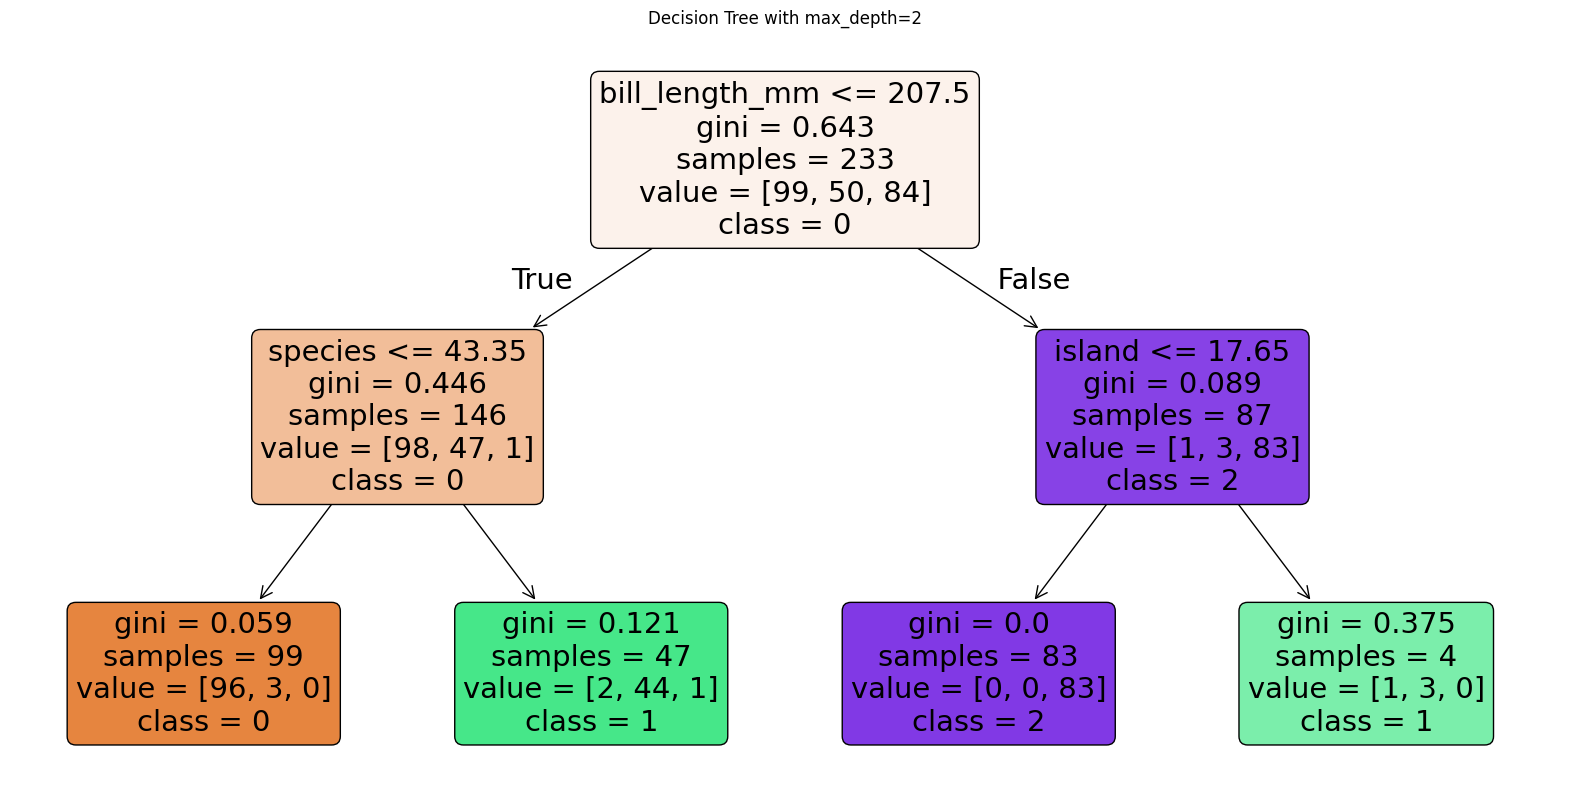

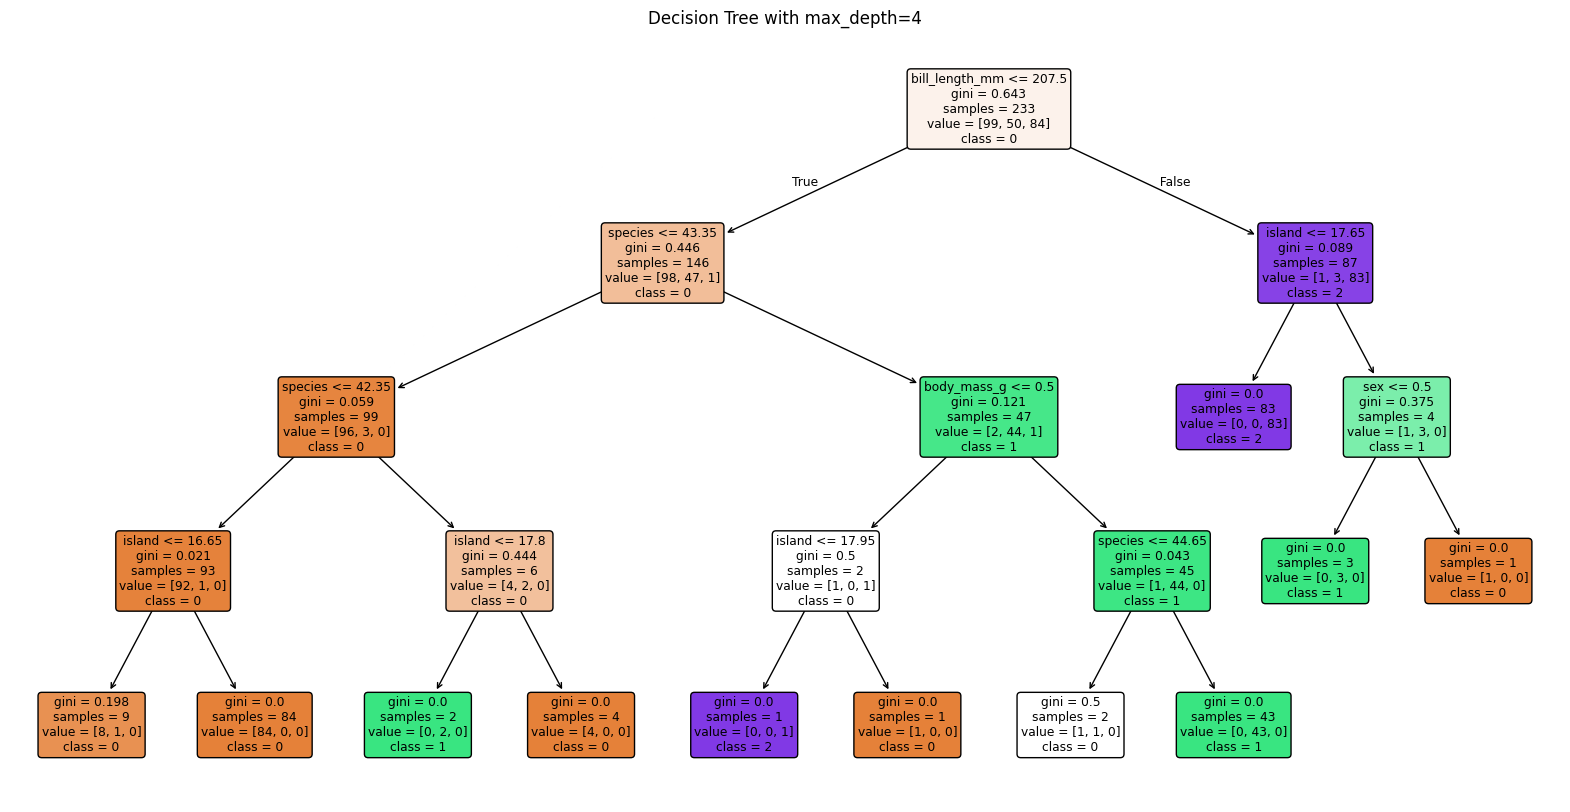

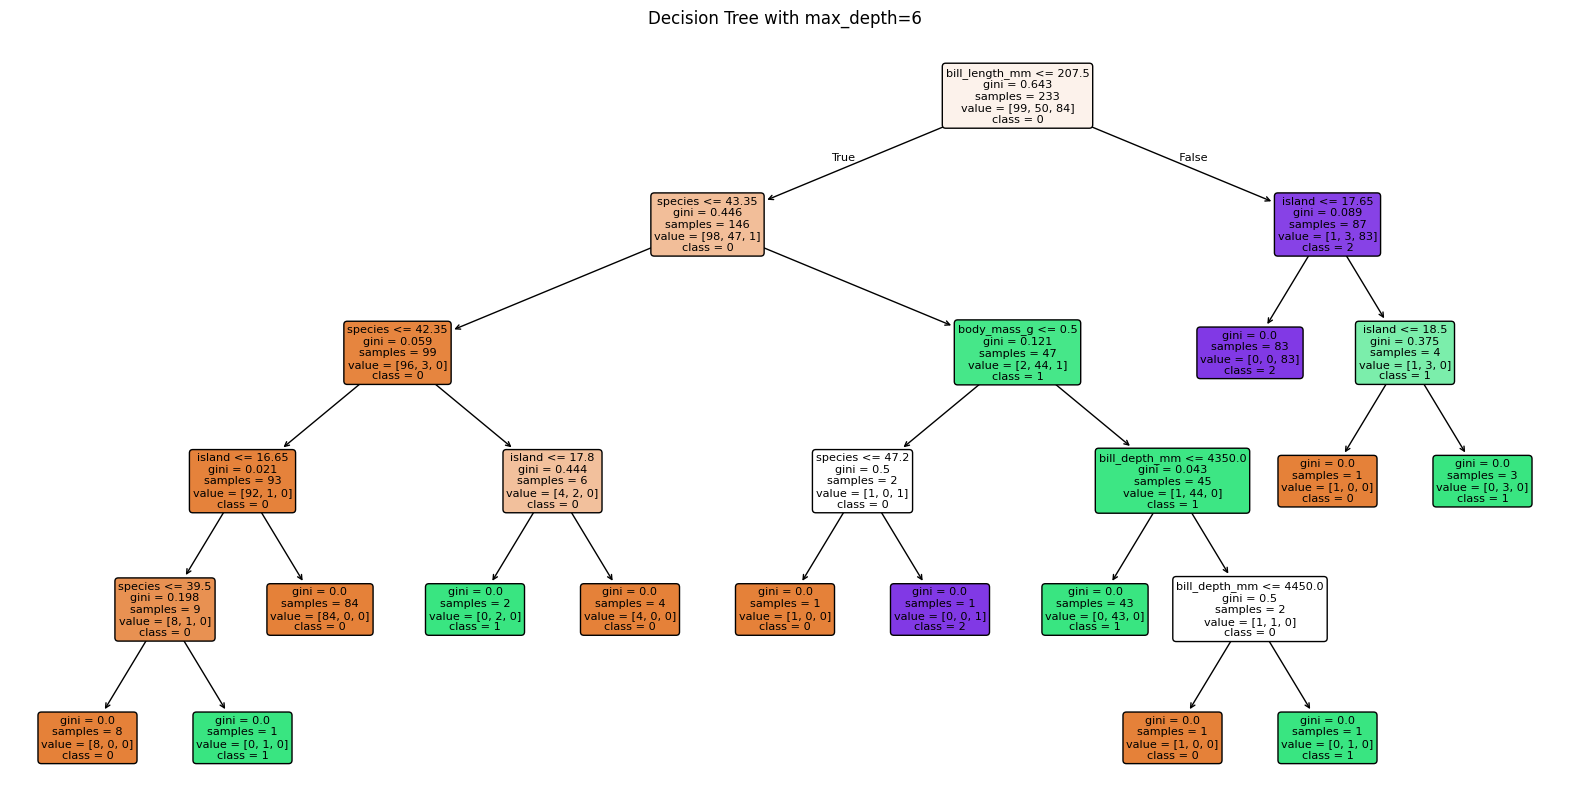

In [42]:

from sklearn import tree

# Trực quan hóa Decision Tree với different max_depth values
for depth in [2, 4, 6]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=23521149)
    model.fit(X_train, y_train)

    # Plot the tree
    plt.figure(figsize=(20,10))
    tree.plot_tree(model, feature_names=penguins_clear.columns,
                   class_names=model.classes_.astype(str),  # Chuyển đổi thành chuỗi
                   filled=True, rounded=True)
    plt.title(f'Decision Tree with max_depth={depth}')
    plt.show()
